# Deep Learning Assignment 1

## Question 3

In [1]:
import math
import random

In [4]:
# sigmoid function
def sigmoid(z):
    sig = 1 / (1 + math.exp(-z))
    
    return sig

# softmax function
def softmax(z):
    numerator = [math.exp(i) for i in z]
    denominator = sum(numerator)
    output = [n/denominator for n in numerator]
    
    return output

# initialize vector of zeros
def zero_vector(dim):
    listofzeros = [0] * dim
    
    return listofzeros

# cross entropy loss
def cross_entropy_loss(ypred):
    ce_loss = -math.log(ypred)
    
    return ce_loss

def calculate_loss(ypred, y):
    if y == 1:
        loss = cross_entropy_loss(ypred[0])
    
    elif y == 0:
        loss = cross_entropy_loss(ypred[1])
    
    else:
        loss = 0
        
    return loss

In [8]:
# forward propagation
def forward_propagate(x, W, b, V, c):
    """
    forward propagation for a two layer neural network
    
    Arguments:
    x - input
    weights -- 
        W - weights, layer 1
        b - bias, layer 1
        V - weights, layer 2
        c - bias, layer 2
    y - true label: [1, 0]

    Return: parameters
    """
    
    # Forward Propagation (from x to loss)
    k = zero_vector(3)
    for j in range(len(k)):
        for i in range(len(x)):
            k[j] += W[i][j] * x[i]
        k[j] += b[j]
    
    # 1st activation: sigmoid
    h = zero_vector(len(k))
    for i in range(len(k)):
        h[i] = sigmoid(k[i])
        
    o = zero_vector(2)
    for j in range(len(o)):
        for i in range(len(h)):
            o[j] = V[i][j] * h[i]
        o[j] += c[j]
    
    # 2nd activation: softmax
    ypred = softmax(o)

    parameters = {'k': k, 'h': h, 'o': o, 'ypred': ypred}
    
    return parameters

In [28]:
def back_propagate(x, W, b, V, c, y, parameters):
    """
    back propagation for a two layer neural network
    
    Arguments:
    x - input
    W - weights, layer 1
    b - bias, layer 1
    V - weights, layer 2
    c - bias, layer 2
    y - true label: [1, 0]
    paramters - (k, h, s, o, l)

    Return: gradients
    """
    
    k = parameters['k']
    h = parameters['h']
    o = parameters['o']
    ypred = parameters['ypred']
    
    grad_ypred = zero_vector(len(ypred))
    for i in range(len(ypred)):
        if y == 1: 
            grad_ypred[i] = -1/ypred[i]
    
    grad_o = zero_vector(len(o))
    for i in range(len(o)):
        for j in range(len(o)):
            if i == j:
                grad_o[j] += grad_ypred[i] * (ypred[i] * (1 - ypred[i]))
            elif i!=j:
                grad_o[j] += grad_ypred[i] * (-ypred[i] * ypred[j])

    grad_h = zero_vector(len(h))
    grad_V = [zero_vector(len(o))] * len(V)
    
    for j in range(len(grad_o)):
        for i in range(len(h)):
            grad_V[i][j] = grad_o[j] * h[i]
            grad_h[i] += grad_o[j] * V[i][j]
            
    grad_c = zero_vector(len(c))
    for i in range(len(c)):
        grad_c[i] += grad_o[i] * 1 # ds/dc = dc/dc = 1

    grad_k = zero_vector(len(k))
    for i in range(len(h)):
        grad_k[i] = grad_h[i] * (h[i] * (1 - h[i]))
        
    grad_W = [zero_vector(len(k))] * len(W)
    for j in range(len(grad_k)):
        for i in range(len(x)): 
            grad_W[i][j] = grad_k[j] * x[i]
            
    grad_b = zero_vector(len(b))
    for i in range(len(k)):
        grad_b[i] += grad_k[i] * 1 # dk/db = db/db = 1
        
    grad_x = zero_vector(len(x))
    for j in range(len(k)):
        for i in range(len(x)):
            grad_x[i] += grad_k[i] * W[i][j]
            
    
    gradients = {
        'grad_V': grad_V,
        'grad_c': grad_c,
        'grad_W': grad_W,
        'grad_b': grad_b,
    }
    
    return gradients

In [7]:
# Initializing inputs and weights
x = [1, -1] # inputs
W = [[1, 1, 1], [-1, -1, -1]] # weights
b = zero_vector(3) # bias
V = [[1, 1], [-1, -1], [-1, -1]]
c = zero_vector(2)
# y = [1, 0] # target class
y = 1

In [9]:
params = forward_propagate(x, W, b, V, c)

In [23]:
y_pred = params['ypred']
loss = calculate_loss(y_pred, y)
loss

0.6931471805599453

In [22]:
back_propagate(x, W, b, V, c, y, params)

{'grad_V': [[-0.44039853898894116, 0.44039853898894116],
  [-0.44039853898894116, 0.44039853898894116],
  [-0.44039853898894116, 0.44039853898894116]],
 'grad_c': [-0.5, 0.5],
 'grad_W': [[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0]],
 'grad_b': [0.0, 0.0, 0.0]}

## Question 4

In [24]:
from data import load_synth
import matplotlib.pyplot as plt

In [36]:
def propagate(x, W, b, V, c, y):
    
    parameters = forward_propagate(x, W, b, V, c)
    prediction = parameters['ypred']
    cost = calculate_loss(prediction, y)
    gradients = back_propagate(x, W, b, V, c, y, parameters)
    
    return cost, gradients

In [37]:
def optimize(Xset, W, b, V, c, Yset, num_iterations, learning_rate):
    
    losses = []
    
    for n in range(num_iterations):
        for x, y in zip(Xset, Yset):
            
            loss, grads = propagate(x, W, b, V, c, y)
            
            grad_V = grads['grad_V']
            grad_c = grads['grad_c']
            grad_W = grads['grad_W']
            grad_b = grads['grad_b']
            
            # W = W - (lr * grad_W)
            W_update = [[t * learning_rate for t in u] for u in grad_W]
            for i in range(len(W_update)):
                for j in range(len(W[i])):
                    W[i][j] -= W_update[i][j]    
        
            # b = b - (lr * grad_b)
            b_update = [z * learning_rate for z in grad_b]
            b = [t-u for t, u in zip(b, b_update)]
        
            # V = V - (lr * grad_V)
            V_update = [[t * learning_rate for t in u] for u in grad_V]
            for i in range(len(V_update)):
                for j in range(len(V[i])):
                    V[i][j] -= V_update[i][j]
                
            # c = c - (lr * grad_c)
            c_update = [z * learning_rate for z in grad_b]
            c = [t-u for t, u in zip(c, c_update)]
            
            # Recording the loss
            losses.append(loss)
                
        weights = {'W': W, 'b': b, 'V': V, 'c': c}
        
        gr = {'grad_W': grad_W, 'grad_b': grad_b, 'grad_V': grad_V, 'grad_c': grad_c}
        
        return weights, gr, losses

In [38]:
W1 = [[random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1)]] # weights
b1 = zero_vector(3) # bias
W2 = [[random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1)]]
b2 = zero_vector(2)

In [39]:
(xtrain, ytrain), (xval, yval), num_cls = load_synth()

In [54]:
weights_q4_001, grads_q4_001, losses_q4_001 = optimize(xtrain, W1, b1, W2, b2, ytrain, 1, 0.001)

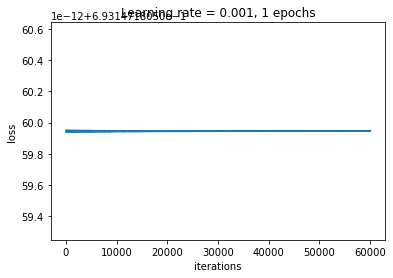

In [55]:
# Plot learning curve (with losses)

plt.plot(losses_q4_001)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate = 0.001, 1 epochs")
plt.show()

In [42]:
weights_q4_003, grads_q4_003, losses_q4_003 = optimize(xtrain, W1, b1, W2, b2, ytrain, 100, 0.003)

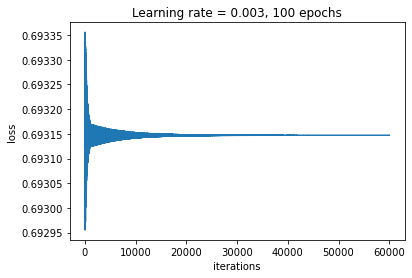

In [45]:
# Plot learning curve (with losses)

plt.plot(losses_q4_003)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate = 0.003, 100 epochs")
plt.show()

In [46]:
weights_q4_01, grads_q4_01, losses_q4_01 = optimize(xtrain, W1, b1, W2, b2, ytrain, 100, 0.01)

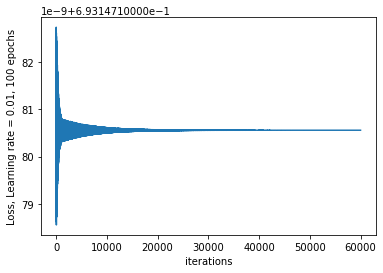

In [49]:
# Plot learning curve (with losses)

plt.plot(losses_q4_01)
plt.ylabel('Loss, Learning rate = 0.01, 100 epochs')
plt.xlabel('iterations')
#plt.title()
plt.show()

In [50]:
weights_q4_03, grads_q4_03, losses_q4_03 = optimize(xtrain, W1, b1, W2, b2, ytrain, 100, 0.03)

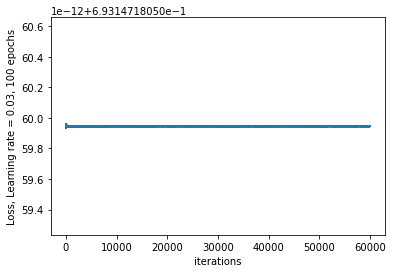

In [51]:
# Plot learning curve (with losses)

plt.plot(losses_q4_03)
plt.ylabel('Loss, Learning rate = 0.03, 100 epochs')
plt.xlabel('iterations')
#plt.title()
plt.show()